<a href="https://colab.research.google.com/github/Kavya-sree/machinelearningbrain_code_samples/blob/main/Handling_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading necessary libraries.

In [1]:
import numpy as np
import pandas as pd

# Loading dataset

In [2]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('/content/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

Also, i am dropping the column "PassengerId", because it is of no importance.



In [4]:
titanic_data.drop("PassengerId",axis=1,inplace=True)

### Check for duplicate values.
[`DataFrame.duplicated()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html): Return boolean Series denoting duplicate rows.

You can count the number of duplicate rows with `sum()`

In [5]:
titanic_data.duplicated().sum()

0

Since the goal of this notebook is to handle missing values in the dataset, we are not going to explore other data analysis and processing techniques. Let's jump right to it.

# Missing value detection

Within pandas, a missing value is denoted by NaN

[`DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html): Used to get a concise summary of the dataframe. This method prints information about a DataFrame including the index dtype and columns, **non-null** values and memory usage.
Yes it prints non-null values, which is very handy for missing value detection.

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


mmm, there is certainly so many null value

## Examine missing values

In [7]:
# check the number of missing values in each column
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

You can use this simple function to get sum of null values for each features. I found an amazing function in kaggle [link](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction?scriptVersionId=5301226&cellId=16) that can be used to give you an idea about the distribution of null values.

In [8]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table

In [9]:
# Missing values statistics
missing_values = missing_values_table(titanic_data)
missing_values

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


Pretty neat information, isn't it?

## Missing value visualization

There is great python library called [missingno](https://github.com/ResidentMario/missingno) that provides missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. It is designed to work with pandas dataframe.

To install the MissingNo library: `pip install missingno`

To import the MissingNo library: `import missingno`

In [10]:
import missingno as msno

**bar**

`msno.bar` is a simple visualization of nullity by column. But this doesn't show the location of missing values. Look closely and you can see count of non-null values present per columns. It also shows percentages on the Y-axis.

<Axes: >

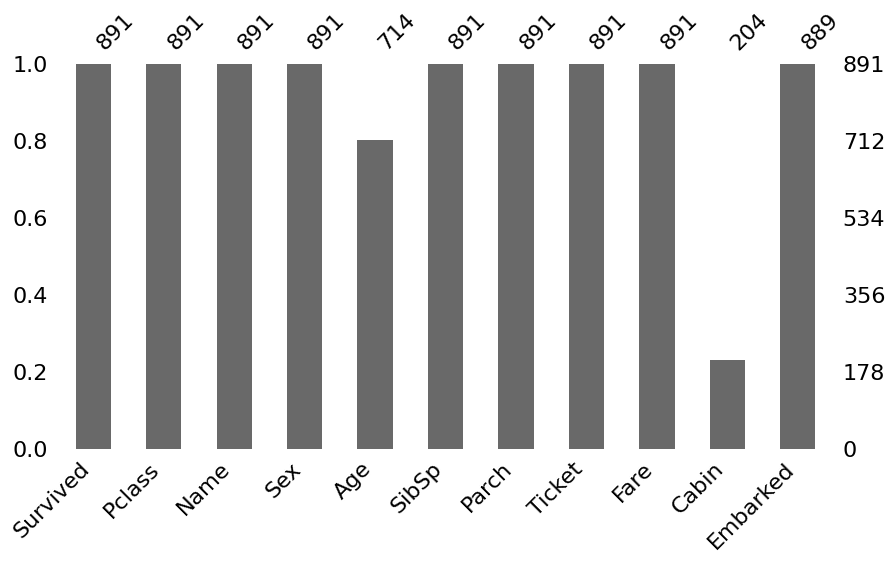

In [11]:
msno.bar(titanic_data, figsize=(10,5))

matrix

`msno.matrix`: The msno.matrix is a data-dense display. We can visually see where the missingness is. The white lines shows location of missing values. For example, in the "Embarked" column there are only two instances of missing data, hence the two white lines.

<Axes: >

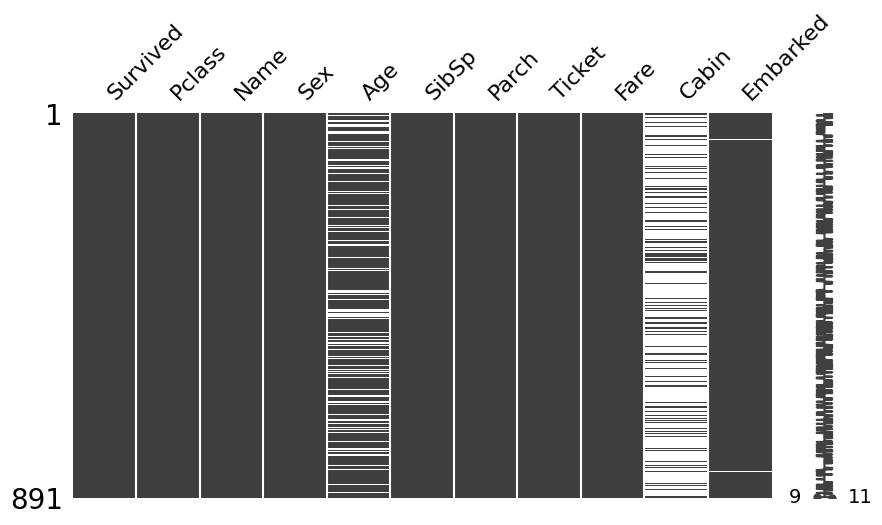

In [12]:
msno.matrix(titanic_data, figsize=(10,5))

We can also try to find the reason for missingness. In the earlier section, we talked about types of missing data. Let's see if we can try to find the reason for missing values.
* The Embarked column has only two missing values and it doesn't seem to be correlated with the other column. So this would be a case of Missing Completely at Random (MCAR) data.

* The Age and Cabin column has a lot of missing values. Also, there doesn't seem to be any reason for missingness.This coul be a case of MAR.

**heatmap**

`msno.heatmap`: The missingno correlation heatmap measures nullity correlation between varibales in the dataset.

<Axes: >

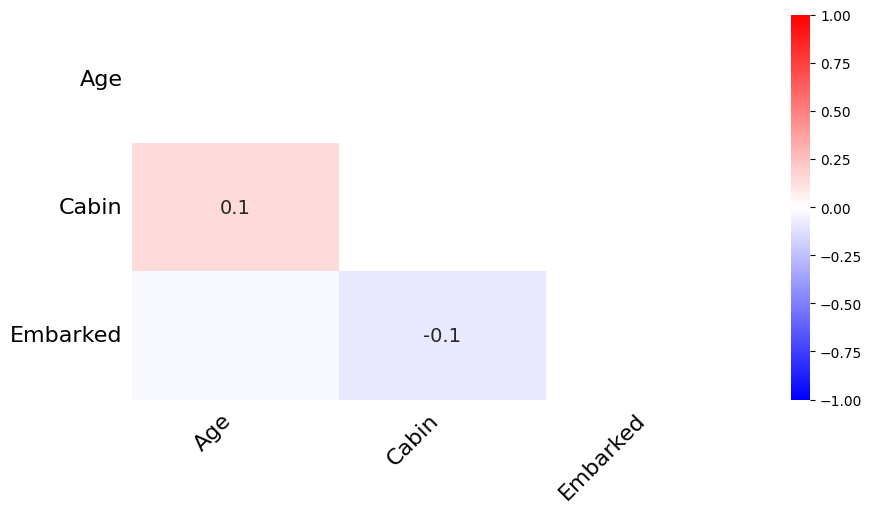

In [13]:
msno.heatmap(titanic_data, figsize=(10,5), cmap="bwr")

From the heatmap it is evident that there is no strong correlations between missing values of different features. This further strengthens our remark that the data are MAR.



**dendrogram**

`msno.dendrogram`: The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap. We can also see relationships between groups of variables.

This functionality uses hierarchical clustering algorithm to cluster the features based on their missingness measured by binary distance.

We can see columns without missing data on upper left. The variables that have more correlation will meet at a distance closer to 0. We can see here that the missingness of Embarked tends to be more similar to Age than to Cabin.But the case here is that the correlation is high since Embarked column has a very few missing values.

<Axes: >

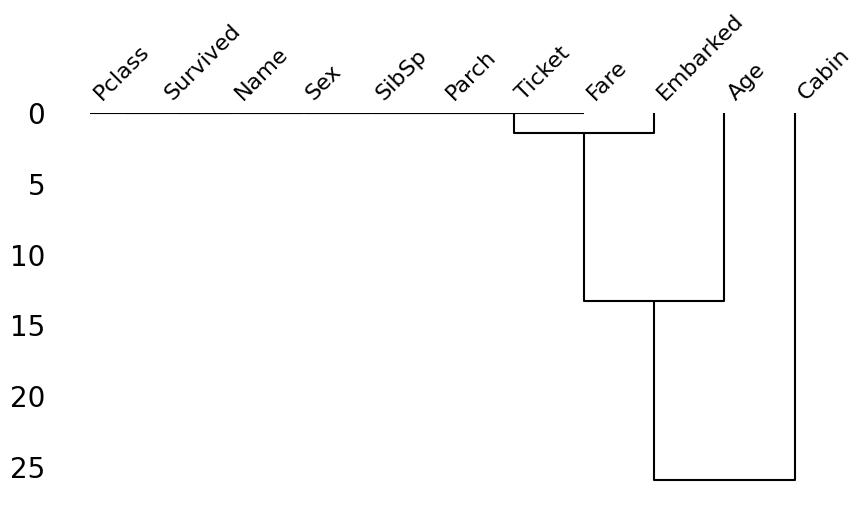

In [14]:
msno.dendrogram(titanic_data, figsize=(10,5))

#Methods to handle missing value

There are several methods to deal with missing values

## Delection methods

The simplest strategy to handle missing data is obviously to remove entire predictor(s) and/or sample(s) that contain missing values.

### Listwise deletion/ Complete case deletion
Remove the entire/complete observation(which contain the missing values) from the dataset. After listwise deletion, the dataset will contain no missing values, but we get a smaller dataset. This obviously leads to loss of data. So if you have large number of variables in the dataset and many observations contain missing values, then this method will remove those observations completely which can make the dataset very small and potentially wasteful.
An advantage of Listwise deletion is it doesn't assume anything about the reason for missing data. It treats the missing values as random, making it perfect for MCAR situations. When data is MCAR, removing rows with missing values doesn't produce bias into the analysis. So the resulting analysis based on the remaining data are unbiased with respect to the missing data.
So, this method should only be used in case were sample size reduction is not a much concern. Otherwise go for other methods like imputation.

In [15]:
# making a copy of the dataframe to make sure the initial DataFrame is unaltered
titanic_data_1= titanic_data.copy()

# drop the rows where at least one element is missing
titanic_data_1.dropna(inplace=True)
titanic_data_1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
titanic_data_2 = titanic_data.copy()

# drop rows which contains any NaN or missing value for Age column
titanic_data_2.dropna(subset=['Age'], how='any', inplace=True)
titanic_data_2['Age'].isnull().sum()

0

### Pairwise deletion/available-case analysis/casewise deletion

An alternative to Listwise deletion is Pairwise deletion to mitigate the loss of data. Compared to listwise deletion, pairwise deletion saves more data because it uses observations that contain some missing data. During Pairwise deletion, only the missing values are deleted were variables were necessary for analysis while the listwise deletes entire entries if any data is missing, regardless of its importance. So using pairwise deletion, any given case/observation may contribute to some analysis but not to others depending on whether the needed data are available. Like when the analysis involves pairs of values (e.g., correlation or covariance), the pairs that have missing values will be removed but still can use the case when analyzing other varibales having non-missing values. Parwise Deletion is used when values are MCAR or MAR but can be biased otherwise.



In [17]:
titanic_data['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values

29.69911764705882

Here the mean value of Age is based on the observed values of Age.




### Drop columns with missing data

Dropping columns with lot of missing data is an option for handling missing data. But this should be done carefully. If the columns contains more than 85% missing data and the column containinf the feature is of no importance, you can delete that column. Always research and analyse before deleting a column.
We can Use dropna() with axis=1 to remove columns with any missing values.

In [18]:
titanic_data_3 = titanic_data.copy()

# drop columns with missing data
titanic_data_3.dropna(axis=1, inplace=True)
titanic_data_3.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


The three columns containing null values have been deleted.

## Imputation methods

Removing the missing data is not always feasible. So we need imputation techniques for replacing the missing data with some substitute value.


### Mean, Median, or Mode Imputation using fillna()

Replace missing values with the mean, median, or mode of the non-missing values for that variable.

* Simple and ease of implementation
* The imputation is done using the existing information from the available data.
Mean and median imputation can provide a good estimate of the missing values, respectively for normally distributed data, and skewed data.
* Mean and Median imputation cannot be applied to categorical columns. They can only work for numerical columns.


You can use the fillna() method of a Pandas DataFrame to perform imputation.

**Mean**

Mean imputation replace missing value with mean value of the column. Can be used when the missing values are numerical. Imputing the mean preserves the mean of the observed data and does not introduce additional variability. So if the data are MCAR, the estimate of the mean remains unbiased. But mean imputation is not an ideal technique because it will still bias your standard error and ignore correlation of data. Since most machine learning problems involve relationship among variables, mean imputation is not a good solution even if data are MCAR.  

In [19]:
titanic_data_4=titanic_data.copy()

# fill the missing value with mean values in column Age.
titanic_data_4['Age'].fillna(int(titanic_data_4['Age'].mean()),inplace = True)
titanic_data_4['Age'].isnull().sum()

0

**Median**

Median imputation replace missing value with Median value of the column. Can be used when the missing values are numerical.
Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.
 Imputing with the median is more robust than imputing with the mean, because it mitigates the effect of outliers

In [20]:
titanic_data_5=titanic_data.copy()

# fill the missing value with median values in column Age.
titanic_data_5['Age'].fillna(int(titanic_data_5['Age'].median()),inplace = True)
titanic_data_5['Age'].isnull().sum()

0

**Mode**

Mode imputation replace the missing value with mode value (most frequent value of the column feature).
The distribution of our imputed data is highly biased.
Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

Note that imputing missing data with mode values can be done with numerical and categorical data.

In [21]:
titanic_data_6=titanic_data.copy()

# fill the missing value with mode value in column Cabin.
titanic_data_6['Cabin'].fillna(titanic_data_6['Cabin'].mode()[0],inplace = True)
titanic_data_6['Cabin'].isnull().sum()

0

### Imputation With SimpleImputer

The [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class from sklearn can be used instead of the fillna() function of pandas. This class replace missing values using descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value. For numerical variables, you can use constant, mean, and median strategy and for categorical columns, you can use most_frequent and constant strategy.

We can also specify placeholder for missing values. It can be specified using the parameter `missing_values`.



In [22]:
from sklearn.impute import SimpleImputer

In [23]:
titanic_data_7=titanic_data.copy()

# imputing all missing value with a constant
constant_imputer = SimpleImputer(strategy='constant')
titanic_data_7.iloc[:,:] = constant_imputer.fit_transform(titanic_data_7)
titanic_data_7.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Advanced imputation methods

Till now we have seen simple techniques for handling missing data. Now let's see advanced technique that uses machine learning algorithms to deal with missing values.

### Multivariate imputation by chained equations (MICE)

Single imputation techniques like mean imputation doesn't account for uncertainity in the imputations. But multiple imputation involves creating multiple predictions for each missing value. Thus the analyses of multiple imputed data take into account the uncertainty in the imputations and yield accurate standard errors.

MICE is a particular multiple imputation technique that works under the assumption that given the variables used in the imputation procedure, the missing data are Missing At Random (MAR). Implementing MICE when data are not MAR could lead to biased estimates. It works by iteratively imputing each variable with missing values using a regression model by taking into account the relationship between variables in the dataset. The advantage of this method is that it can handle different types of missing data.

The chained equations approach is very flexible and can handle variables of varying types as well as complexities such as bounds or survey skip patterns. For more info check the [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/).

MICE can be implemented in Python via `sklearn` package `IterativeImputer`. The `IterativeImputer` is still being experimental, so we need to import `enable_iterative_imputer` first.



In [24]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
titanic_data_mice = titanic_data.copy(deep=True)

mice_imputer = IterativeImputer()
titanic_data_mice['Age'] = mice_imputer.fit_transform(titanic_data_mice[['Age']])

titanic_data_mice['Age'].isnull().sum()

0

### KNN

Nearest neighbor (NN) imputation algorithms are another advanced technique to fill in missing data where each missing value on each column features is replaced by a value obtained from related cases in the whole set of observations.
The `KNNImputer` class of `sklearn` provides imputation for filling in missing values using the k-Nearest Neighbors approach.

In [25]:
from sklearn.impute import KNNImputer
titanic_data_knn = titanic_data.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
titanic_data_knn['Age'] = knn_imputer.fit_transform(titanic_data_knn[['Age']])

titanic_data_knn['Age'].isnull().sum()

0